In [3]:
#Import the modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta

In [4]:
# Gather the Data 

## Get the current working directory using the 'os' module
current_directory = os.getcwd()

## Specify the file name ('Expenses.xlsx') that you want to read
file_name='ExpensesRunPython.xlsx'

# Combine the current working directory and the file name to get the full file path
file_path= os.path.join(current_directory,file_name)

# Read the Excel file into a pandas DataFrame using 'pd.read_excel()'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data was loaded successfully
df.head()

,Date,Category,Description,Amount (PHP),Payment Method,Merchant,Location,Tags,Payment Status,Column10,Column11
0,August 2 2023,Groceries,"Groceries, house items, snacks",1468.75,Debit Card,SM,Quezon City,Food,Paid,NaN,113.0
1,July 31 2023,Meals,Daily Meal,227.00,E-Wallet,AllDayMadison,Quezon City,Food,Paid,NaN,23.0
2,August 2 2023,Snacks,Turon,50.00,Cash,SM,Quezon City,Food,Paid,NaN,NaN
3,July 30 2023,Snacks,Ice Cream,120.00,E-Wallet,7-Eleven,Quezon City,Food,Paid,NaN,NaN
4,August 3 2023,Commute,Bus Ticket,24.00,Cash,Edsa Carousel,Quezon City,Transportation,Paid,NaN,NaN


In [5]:
# Print tail

df.tail()

,Date,Category,Description,Amount (PHP),Payment Method,Merchant,Location,Tags,Payment Status,Column10,Column11
163,August 20 2023,Commute,Bus/Jeepeney Ticket,12.0,Cash,Jeepney,Quezon City,Transportation,Paid,NaN,NaN
164,August 20 2023,Snacks,Turon,25.0,Cash,SM,Quezon City,Food,Paid,NaN,NaN
165,August 20 2023,House Item,Curtain,399.2,Debit Card,SM,Quezon City,House Item,Paid,NaN,NaN
166,August 20 2023,Meals,Daily Meal,410.0,Cash,KFC,Quezon City,Food,Paid,NaN,NaN
167,August 20 2023,Meals,Daily Meal,647.0,E-Wallet,AllDayMadison,Quezon City,Food,Paid,NaN,NaN


In [6]:
# Check Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            132 non-null    object 
 1   Category        168 non-null    object 
 2   Description     168 non-null    object 
 3   Amount (PHP)    168 non-null    float64
 4   Payment Method  168 non-null    object 
 5   Merchant        168 non-null    object 
 6   Location        168 non-null    object 
 7   Tags            168 non-null    object 
 8   Payment Status  168 non-null    object 
 9   Column10        0 non-null      float64
 10  Column11        2 non-null      float64
dtypes: float64(3), object(8)
memory usage: 14.6+ KB


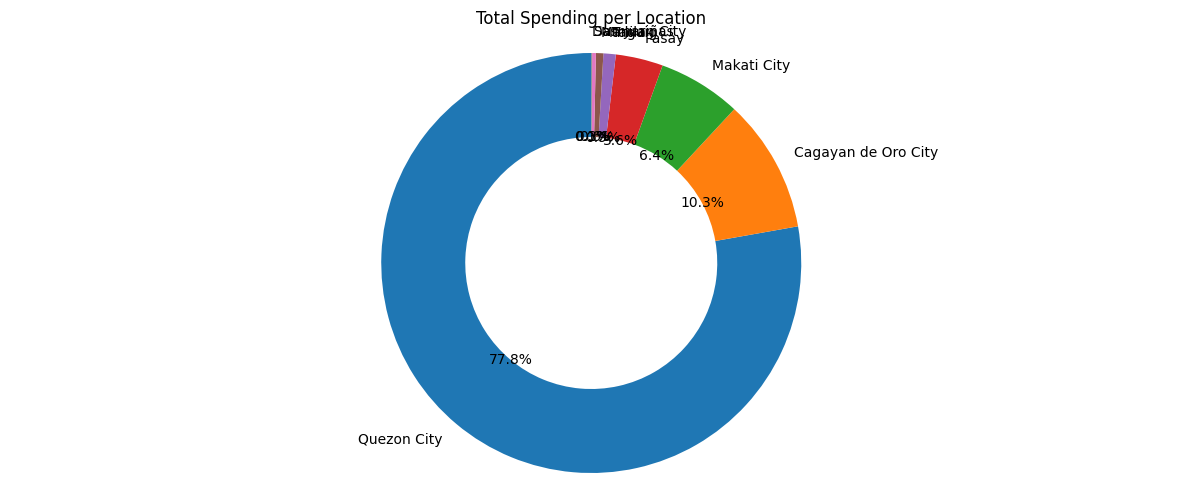

In [7]:
#Data Visualization Donut Chart

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
location_totals = df.groupby('Location')['Amount (PHP)'].sum().reset_index()

# Sort the data by the total amount in descending order
location_totals = location_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Donut Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Location' and 'Amount' columns for plotting
locations = location_totals['Location']
amounts = location_totals['Amount (PHP)']

# Plot the donut chart
plt.pie(amounts, labels=locations, wedgeprops=dict(width=0.4), autopct='%1.1f%%', startangle=90)

# Add a circle in the center to create the donut chart
circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Add a title
plt.title('Total Spending per Location')

# Show the plot
plt.axis('equal')
plt.show()

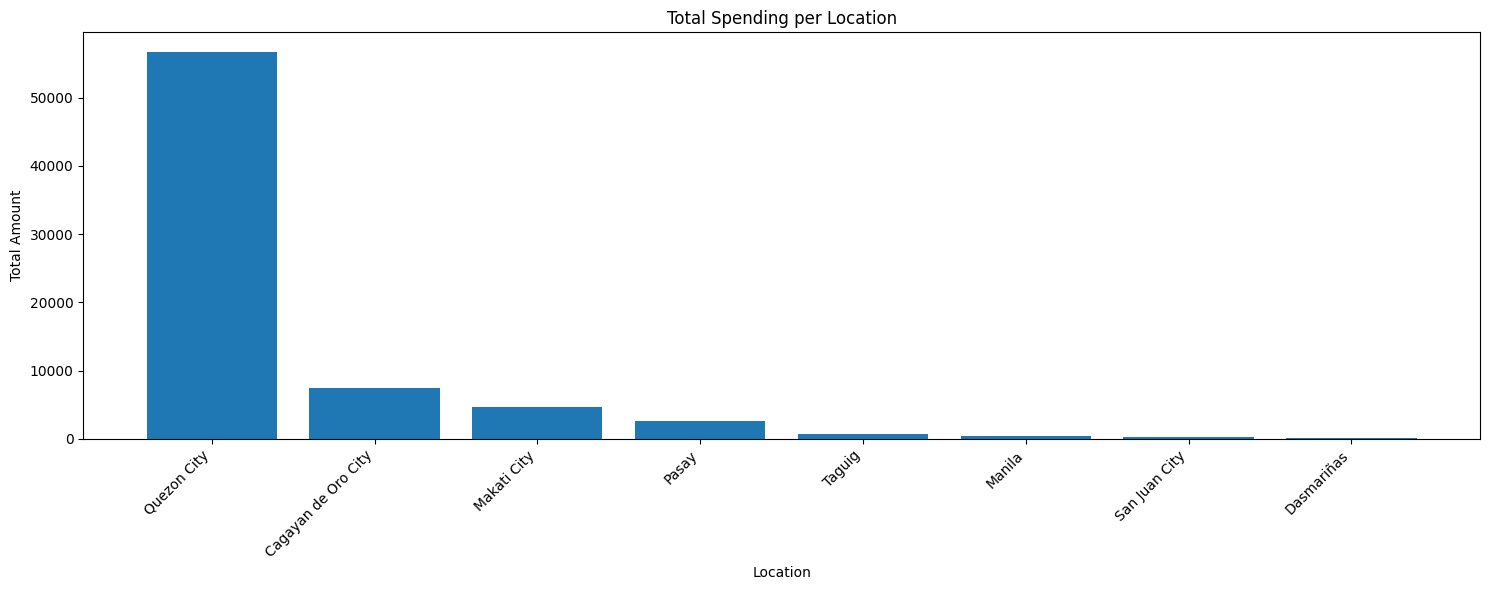

In [8]:
# Data Visualization Column Chart

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
location_totals = df.groupby('Location')['Amount (PHP)'].sum().reset_index()

# Sort the data by the total amount in descending order
location_totals = location_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Location' and 'Amount' columns for plotting
locations = location_totals['Location']
amounts = location_totals['Amount (PHP)']

# Plot the column chart
plt.bar(locations, amounts)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Total Amount')
plt.title('Total Spending per Location')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.show()

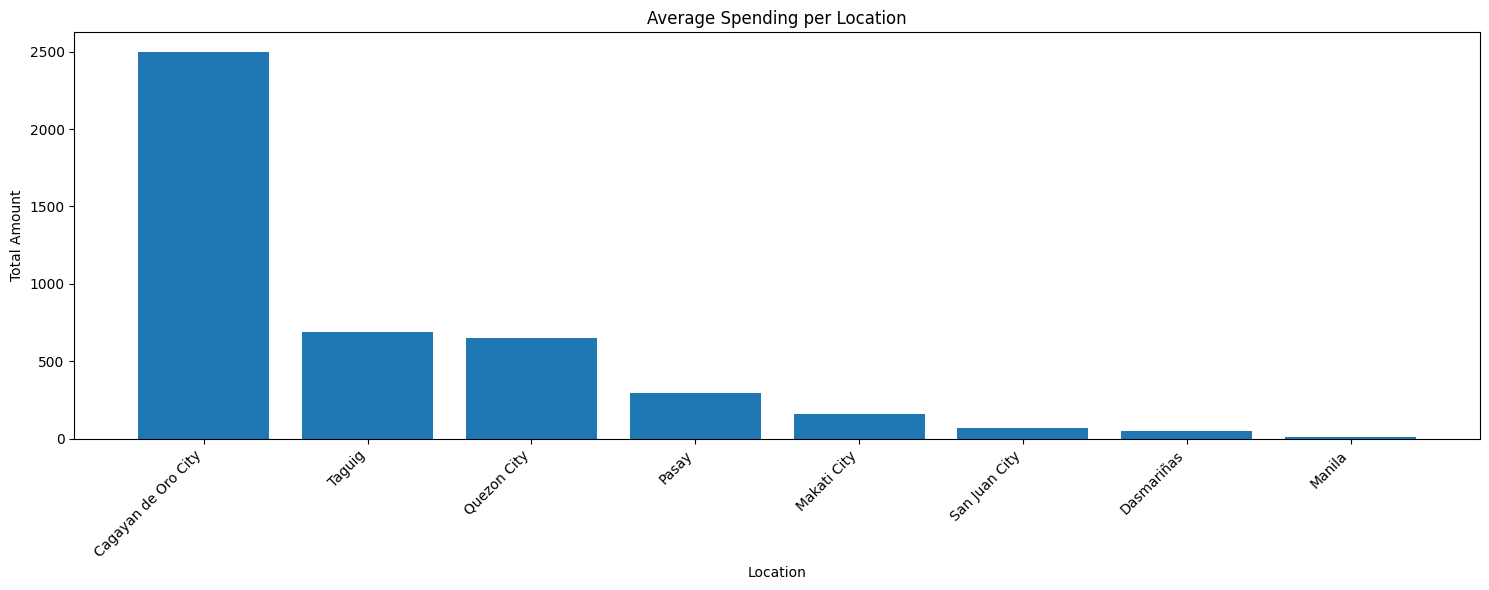

In [9]:
# Average Spending per Location
# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
location_totals = df.groupby('Location')['Amount (PHP)'].mean().reset_index()

# Sort the data by the total amount in descending order
location_totals = location_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Location' and 'Amount' columns for plotting
locations = location_totals['Location']
amounts = location_totals['Amount (PHP)']

# Plot the column chart
plt.bar(locations, amounts)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Total Amount')
plt.title('Average Spending per Location')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
#!pip install nbformat --upgrade


In [11]:
# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
location_totals = df.groupby('Location')['Amount (PHP)'].sum().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
location_totals = location_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(location_totals, path=['Location'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Total Spending per Location (Treemap)')

# Show the plot
fig.show()

In [12]:
#Average Spending per location

# Calculate average spending per location
average_spending_per_location = df.groupby('Location')['Amount (PHP)'].mean()

# Calculate average spending per location
average_spending_per_location = df.groupby('Location')['Amount (PHP)'].mean().reset_index()

# Create the Treemap Visualization

# Sort the data by the average amount in descending order
average_spending_per_location = average_spending_per_location.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(average_spending_per_location, path=['Location'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Average Spending per Location (Treemap)')

# Show the plot
fig.show()

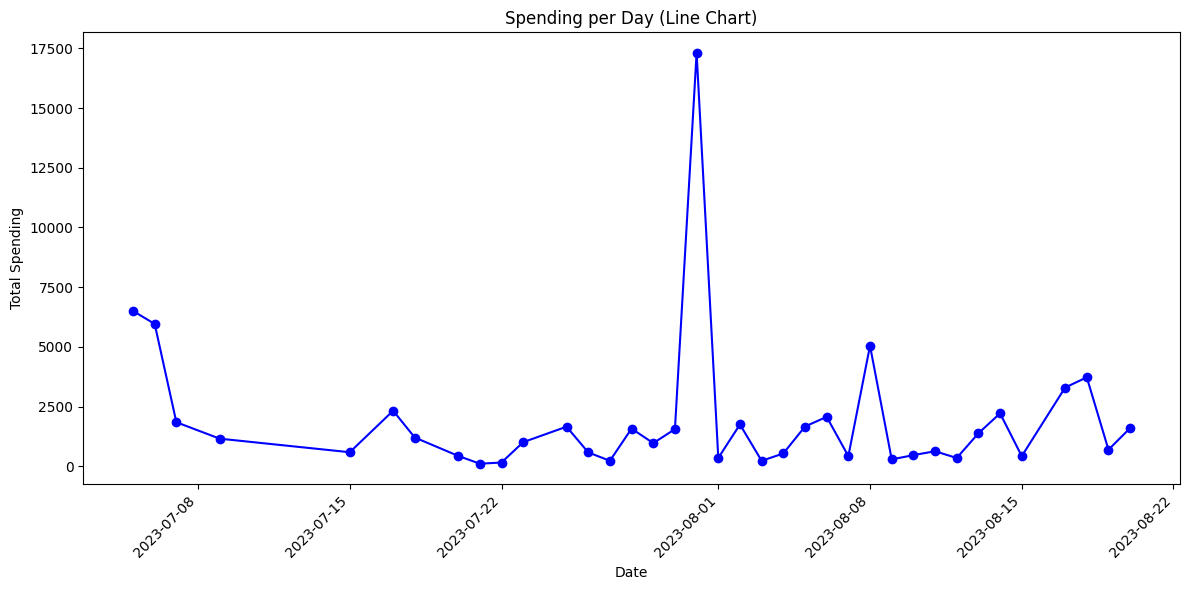

In [13]:
# Data Visualization Spending per Day

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by 'Date' and calculate the total 'Amount' for each day
daily_spending = df.groupby('Date')['Amount (PHP)'].sum().reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = daily_spending['Date']
amounts = daily_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Spending per Day (Line Chart)')

# Format the x-axis date labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

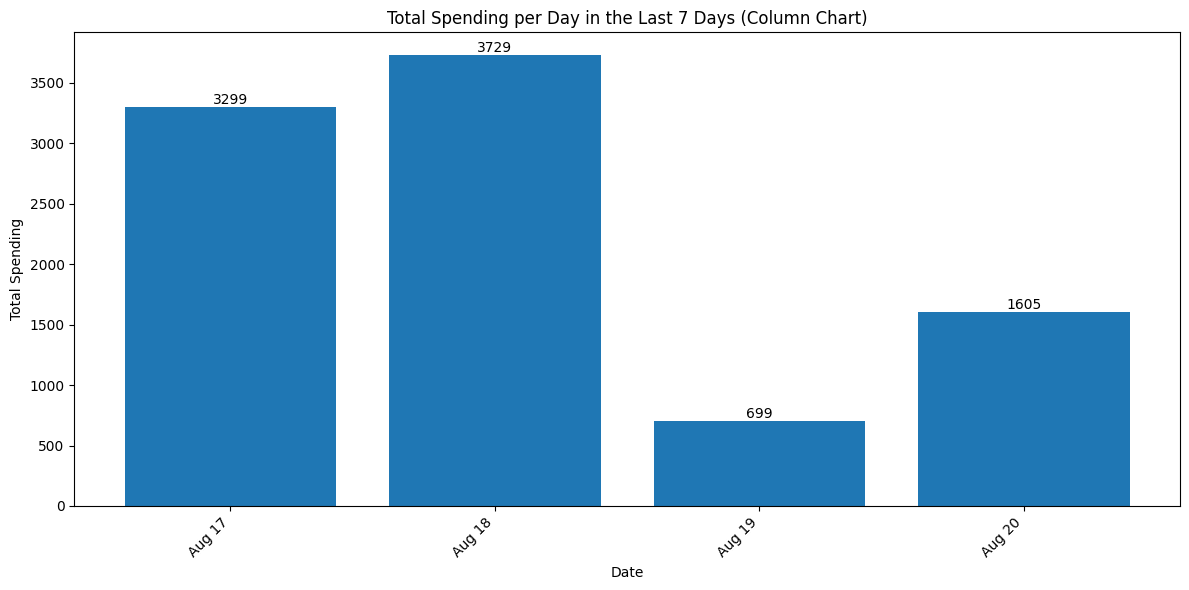

In [14]:
# Spending on the last 7 days

import calendar
from datetime import datetime, timedelta
# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the current day and the date 7 days ago
current_day = datetime.today()
last_7_days_start = current_day - timedelta(days=6)

# Filter data for the last 7 days
last_7_days_data = df[(df['Date'] >= last_7_days_start) & (df['Date'] <= current_day)]

# Group the filtered DataFrame by date and calculate the total 'Amount' for each day
daily_spending = last_7_days_data.groupby(last_7_days_data['Date'].dt.date)['Amount (PHP)'].sum().reset_index()

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = daily_spending['Date']
amounts = daily_spending['Amount (PHP)']

# Plot the column chart
bars = plt.bar(dates, amounts)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending per Day in the Last 7 Days (Column Chart)')

# Format the x-axis date labels as 'Month Day'
date_labels = [date.strftime('%b %d') for date in dates]
plt.xticks(dates, date_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

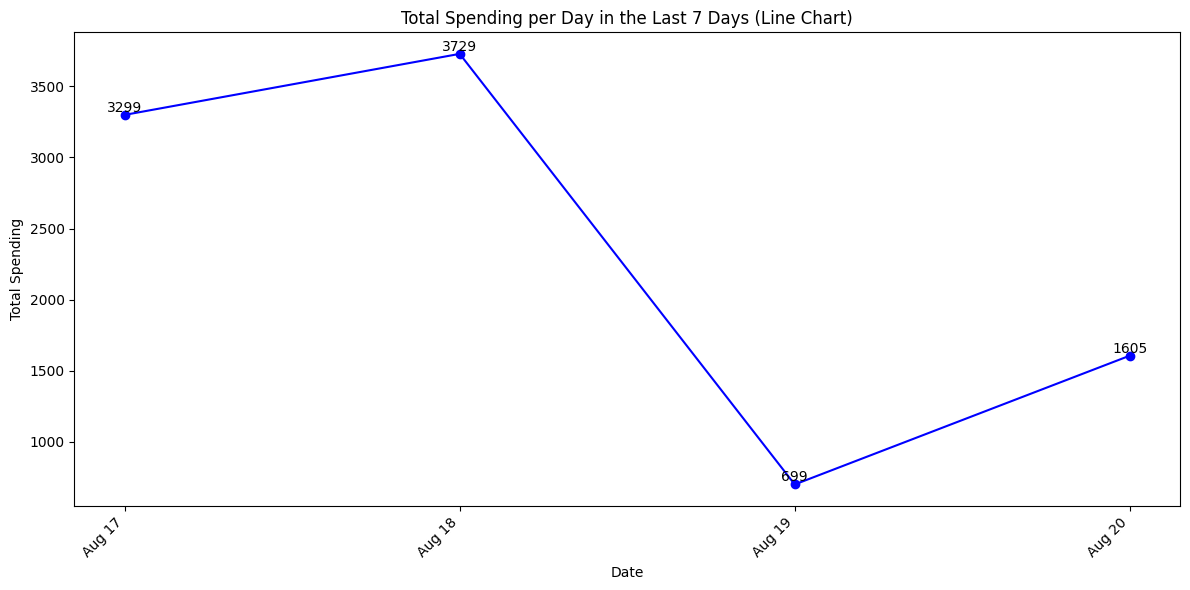

In [15]:
# Line Chart last seven days

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the current day and the date 7 days ago
current_day = datetime.today()
last_7_days_start = current_day - timedelta(days=6)

# Filter data for the last 7 days
last_7_days_data = df[(df['Date'] >= last_7_days_start) & (df['Date'] <= current_day)]

# Group the filtered DataFrame by date and calculate the total 'Amount' for each day
daily_spending = last_7_days_data.groupby(last_7_days_data['Date'].dt.date)['Amount (PHP)'].sum().reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = daily_spending['Date']
amounts = daily_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add data labels
for date, amount in zip(dates, amounts):
    plt.text(date, amount, str(int(amount)), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending per Day in the Last 7 Days (Line Chart)')

# Format the x-axis date labels as 'Month Day'
date_labels = [date.strftime('%b %d') for date in dates]
plt.xticks(dates, date_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

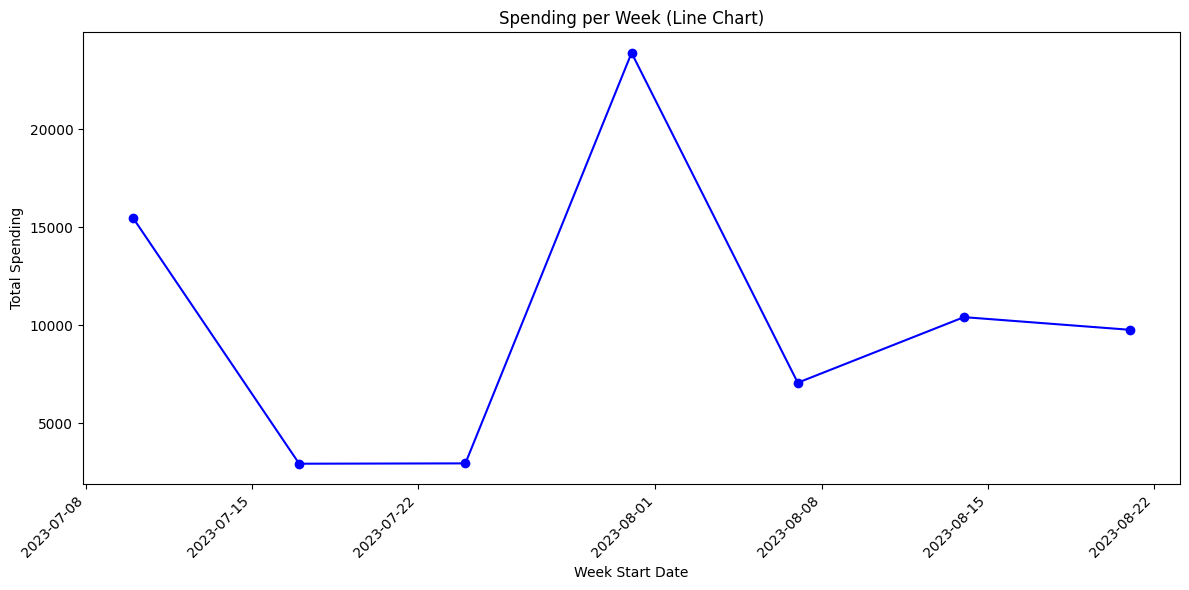

In [16]:
# Weekly Analysis

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by 'Date' and calculate the total 'Amount' for each week
weekly_spending = df.resample('W-Mon', on='Date')['Amount (PHP)'].sum().reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = weekly_spending['Date']
amounts = weekly_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Week Start Date')
plt.ylabel('Total Spending')
plt.title('Spending per Week (Line Chart)')

# Format the x-axis date labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

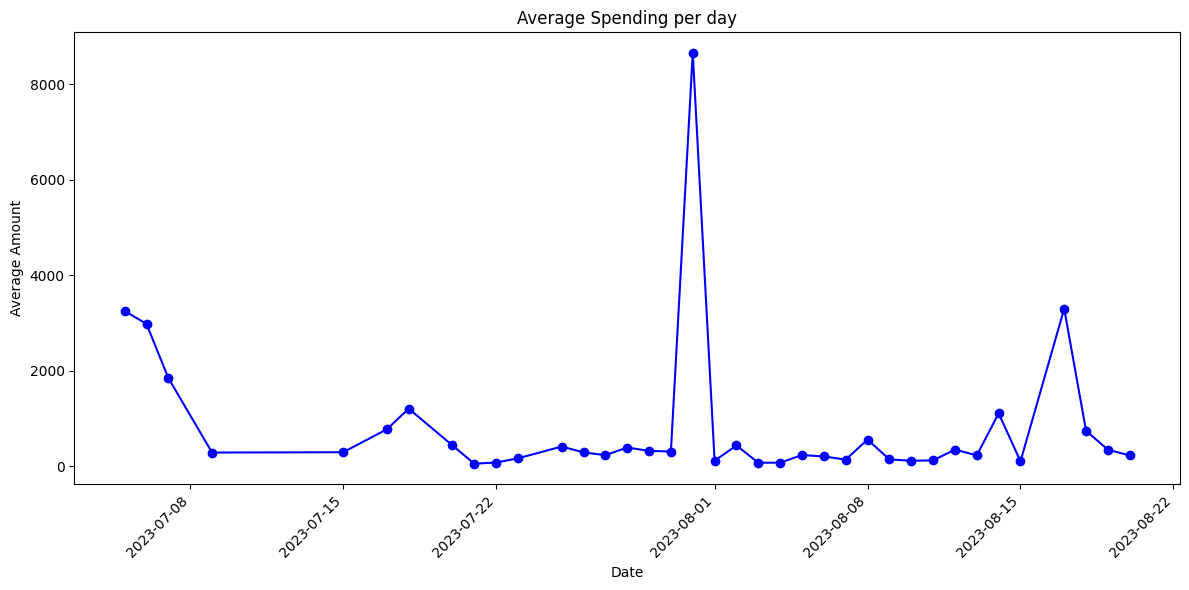

In [17]:
#Average Spending per Day

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by 'Date' and calculate the total 'Amount' for each day
daily_spending = df.groupby('Date')['Amount (PHP)'].mean().reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = daily_spending['Date']
amounts = daily_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.title('Average Spending per day')

# Format the x-axis date labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

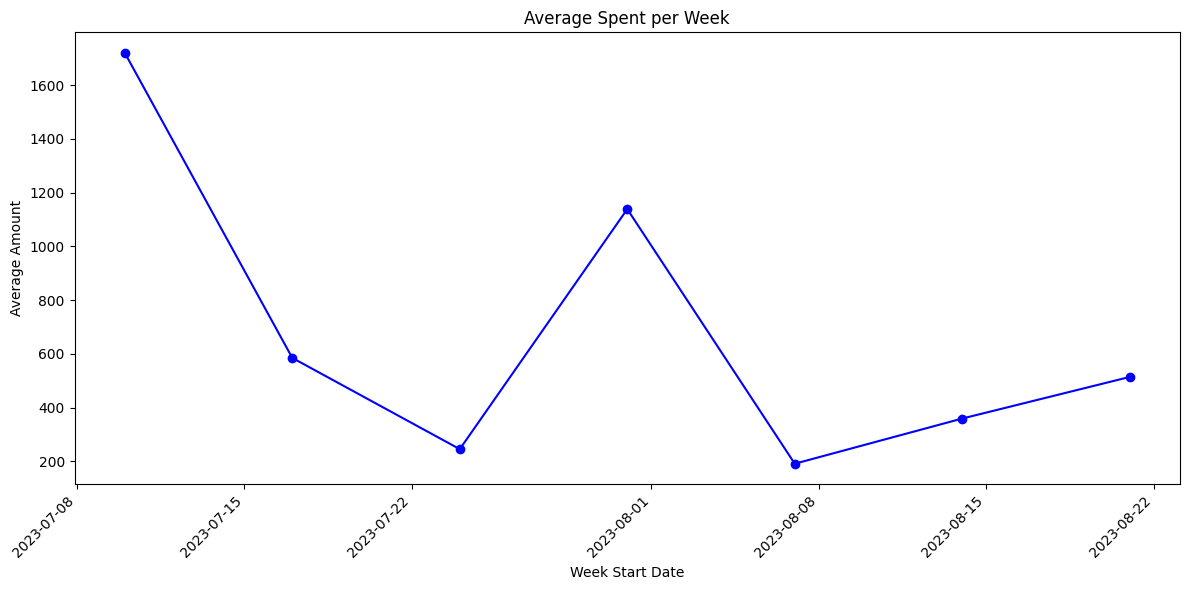

In [18]:
# Average Weekly

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by 'Date' and calculate the total 'Amount' for each week
weekly_spending = df.resample('W-Mon', on='Date')['Amount (PHP)'].mean().reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = weekly_spending['Date']
amounts = weekly_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Week Start Date')
plt.ylabel('Average Amount')
plt.title('Average Spent per Week')

# Format the x-axis date labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

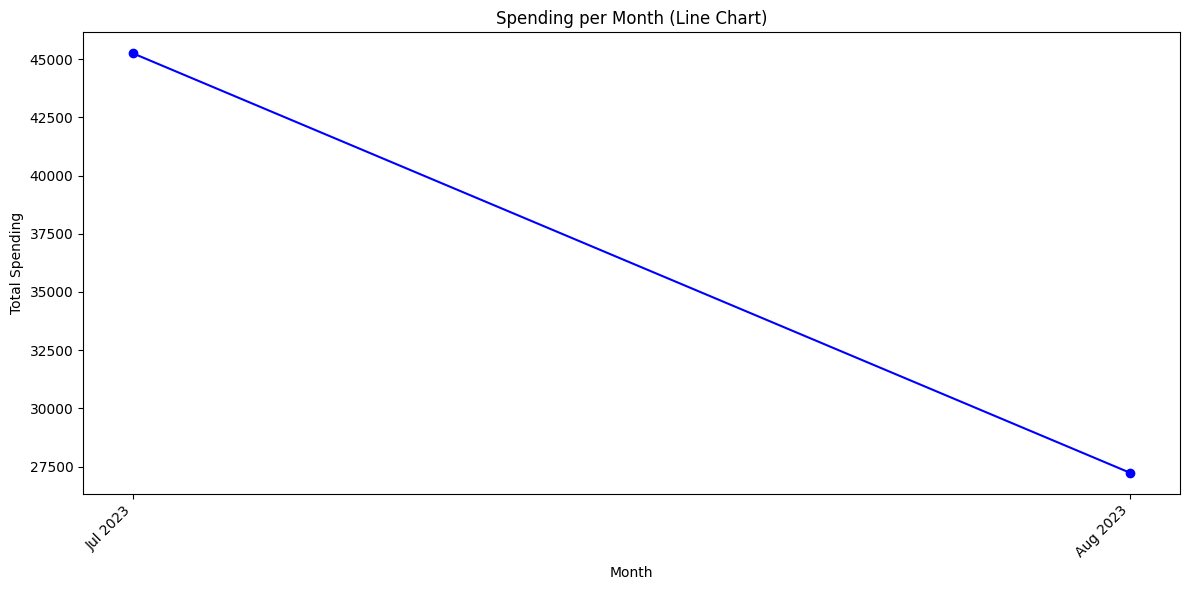

In [19]:
#Data Visualization Spending per Month


# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the DataFrame by 'YearMonth' and calculate the total 'Amount' for each month
monthly_spending = df.groupby('YearMonth')['Amount (PHP)'].sum().reset_index()

# Convert 'YearMonth' to a string representation of the month (e.g., '2023-01' to 'Jan 2023')
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.strftime('%b %Y')

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'YearMonth' and 'Amount' columns for plotting
months = monthly_spending['YearMonth']
amounts = monthly_spending['Amount (PHP)']

# Plot the line chart
plt.plot(months, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Spending per Month (Line Chart)')

# Format the x-axis month labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

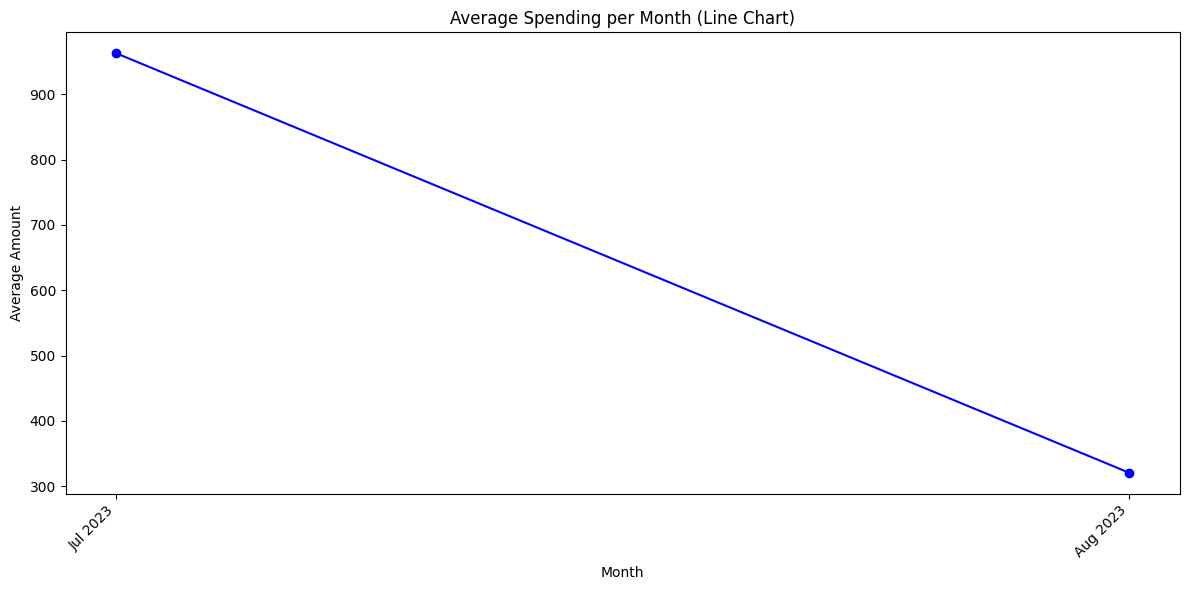

In [20]:
#Average Spending per Month

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the DataFrame by 'YearMonth' and calculate the total 'Amount' for each month
monthly_spending = df.groupby('YearMonth')['Amount (PHP)'].mean().reset_index()

# Convert 'YearMonth' to a string representation of the month (e.g., '2023-01' to 'Jan 2023')
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.strftime('%b %Y')

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'YearMonth' and 'Amount' columns for plotting
months = monthly_spending['YearMonth']
amounts = monthly_spending['Amount (PHP)']

# Plot the line chart
plt.plot(months, amounts, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.title('Average Spending per Month (Line Chart)')

# Format the x-axis month labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

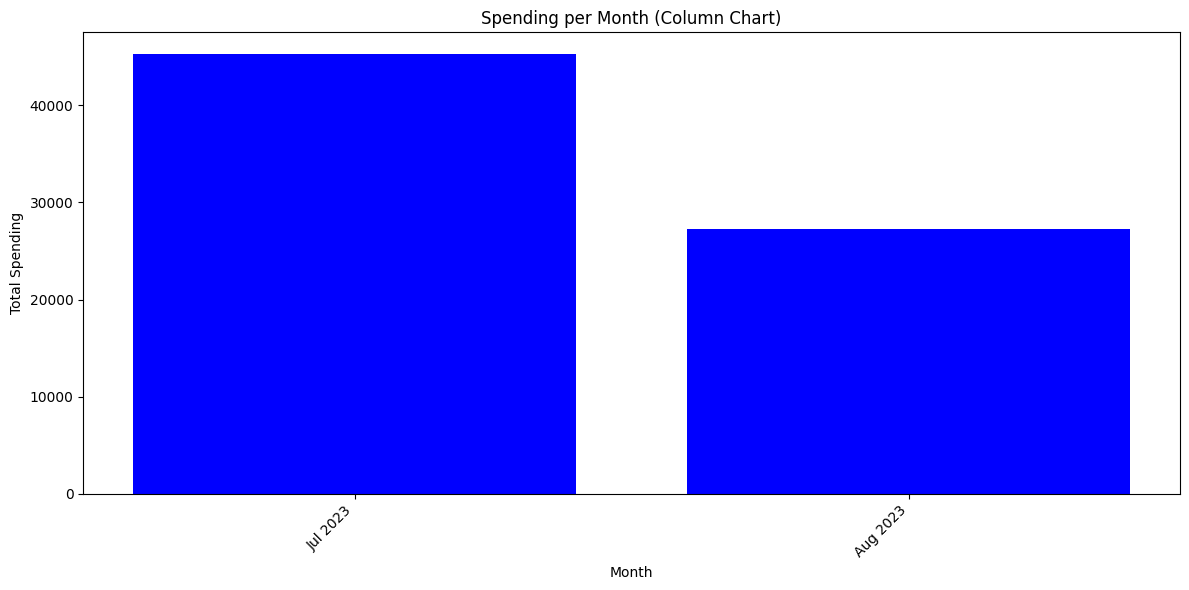

In [21]:
# Spending per Month Column Chart

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the DataFrame by 'YearMonth' and calculate the total 'Amount' for each month
monthly_spending = df.groupby('YearMonth')['Amount (PHP)'].sum().reset_index()

# Convert 'YearMonth' to a string representation of the month (e.g., '2023-01' to 'Jan 2023')
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.strftime('%b %Y')

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'YearMonth' and 'Amount' columns for plotting
months = monthly_spending['YearMonth']
amounts = monthly_spending['Amount (PHP)']

# Plot the column chart
plt.bar(months, amounts, color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Spending per Month (Column Chart)')

# Format the x-axis month labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

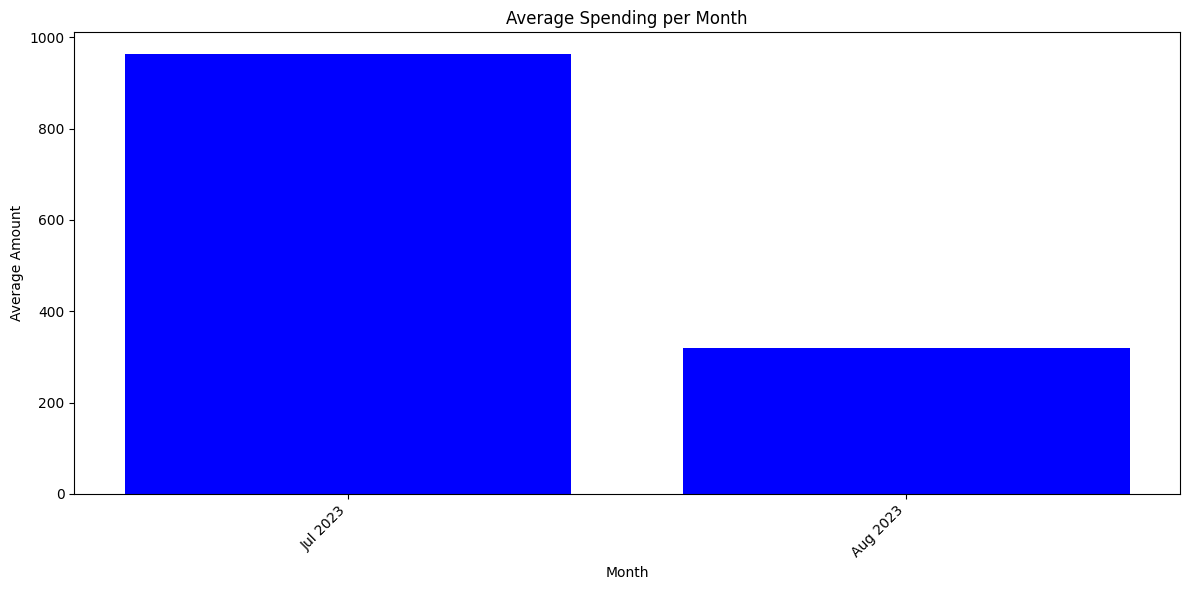

In [22]:
#Average Spending per Month

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the DataFrame by 'YearMonth' and calculate the total 'Amount' for each month
monthly_spending = df.groupby('YearMonth')['Amount (PHP)'].mean().reset_index()

# Convert 'YearMonth' to a string representation of the month (e.g., '2023-01' to 'Jan 2023')
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.strftime('%b %Y')

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'YearMonth' and 'Amount' columns for plotting
months = monthly_spending['YearMonth']
amounts = monthly_spending['Amount (PHP)']

# Plot the column chart
plt.bar(months, amounts, color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.title('Average Spending per Month')

# Format the x-axis month labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

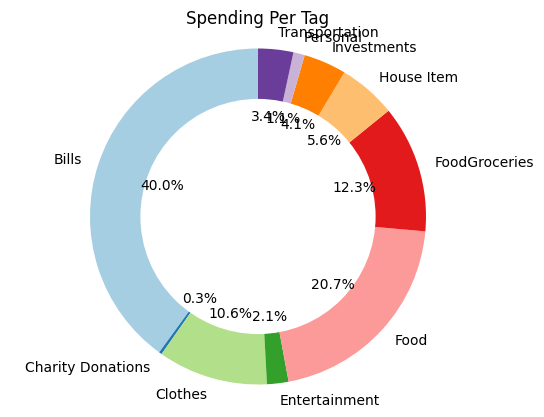

In [23]:
# Spending per tag

# Calculate spending per tag
spending_per_tag = df.groupby('Tags')['Amount (PHP)'].sum()

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(spending_per_tag, labels=spending_per_tag.index, autopct='%1.1f%%',
       startangle=90, colors=plt.cm.Paired.colors)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)  # Draw white circle to create the "donut" appearance
ax.axis('equal')  # Equal aspect ratio ensures the chart is circular.

# Add a title
plt.title('Spending Per Tag')

# Show the chart
plt.show()

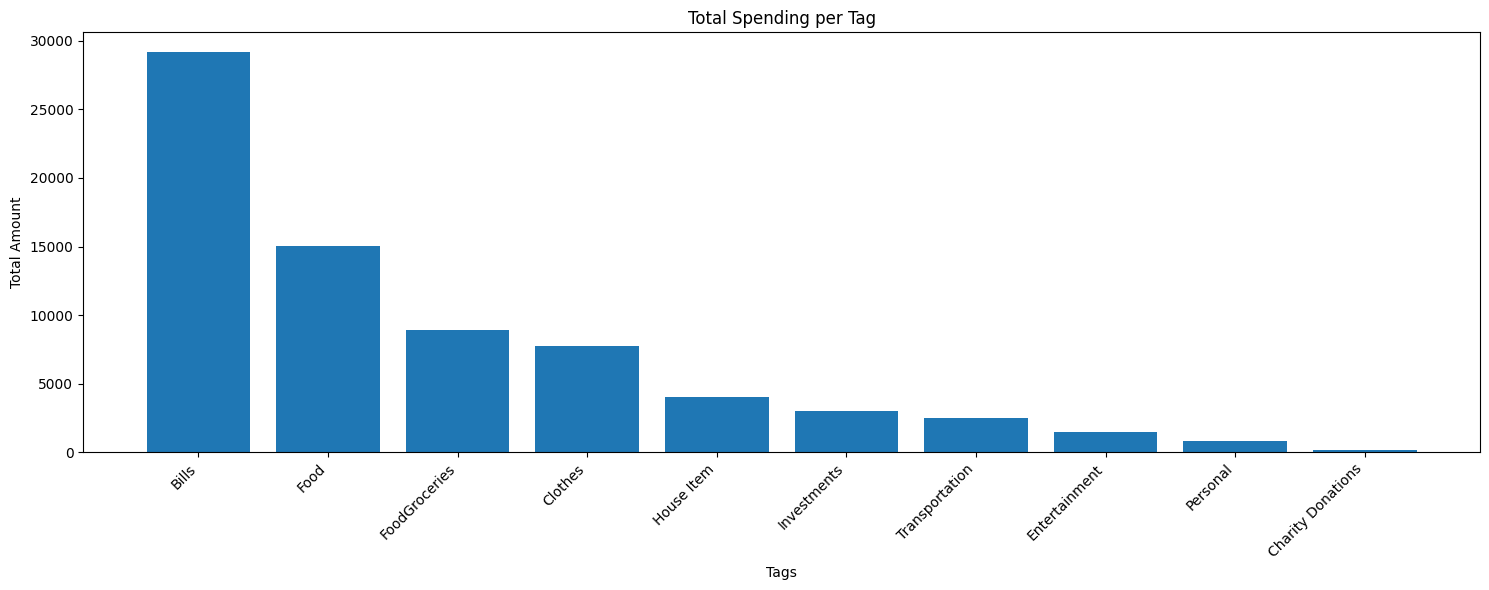

In [24]:
# Total per Tag

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Tag_totals = df.groupby('Tags')['Amount (PHP)'].sum().reset_index()

# Sort the data by the total amount in descending order
Tag_totals = Tag_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Location' and 'Amount' columns for plotting
Tags = Tag_totals['Tags']
amounts = Tag_totals['Amount (PHP)']

# Plot the column chart
plt.bar(Tags, amounts)

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Total Amount')
plt.title('Total Spending per Tag')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

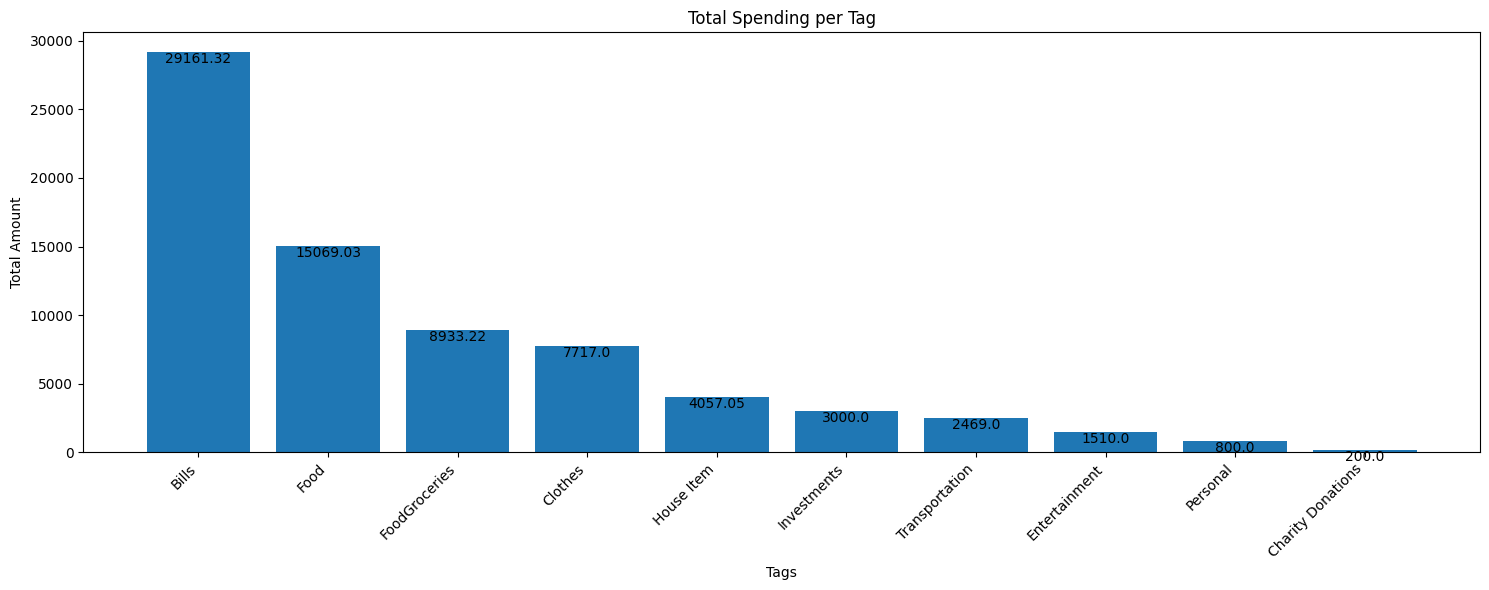

In [25]:
# Group the DataFrame by 'Tags' and calculate the total 'Amount' for each tag
Tag_totals = df.groupby('Tags')['Amount (PHP)'].sum().reset_index()

# Sort the data by the total amount in descending order
Tag_totals = Tag_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Tags' and 'Amount' columns for plotting
Tags = Tag_totals['Tags']
amounts = Tag_totals['Amount (PHP)']

# Plot the column chart
bars = plt.bar(Tags, amounts)

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Total Amount')
plt.title('Total Spending per Tag')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom' if yval < 0 else 'top', ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Tree Map per Tag

# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Tags_totals = df.groupby('Tags')['Amount (PHP)'].sum().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
Tags_totals = Tags_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(Tags_totals, path=['Tags'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Total Spending per Tag (Treemap)')

# Show the plot
fig.show()

In [27]:
# Average per Tag Tree Map

# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Tags_totals = df.groupby('Tags')['Amount (PHP)'].mean().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
Tags_totals = Tags_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(Tags_totals, path=['Tags'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Average Spending per Tag (Treemap)')

# Show the plot
fig.show()

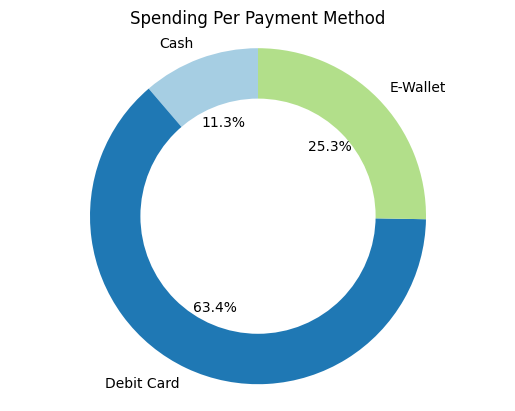

In [28]:
#Spending per Payment Method

# Calculate spending per Payment Method
spending_per_tag = df.groupby('Payment Method')['Amount (PHP)'].sum()

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(spending_per_tag, labels=spending_per_tag.index, autopct='%1.1f%%',
       startangle=90, colors=plt.cm.Paired.colors)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)  # Draw white circle to create the "donut" appearance
ax.axis('equal')  # Equal aspect ratio ensures the chart is circular.

# Add a title
plt.title('Spending Per Payment Method')

# Show the chart
plt.show()

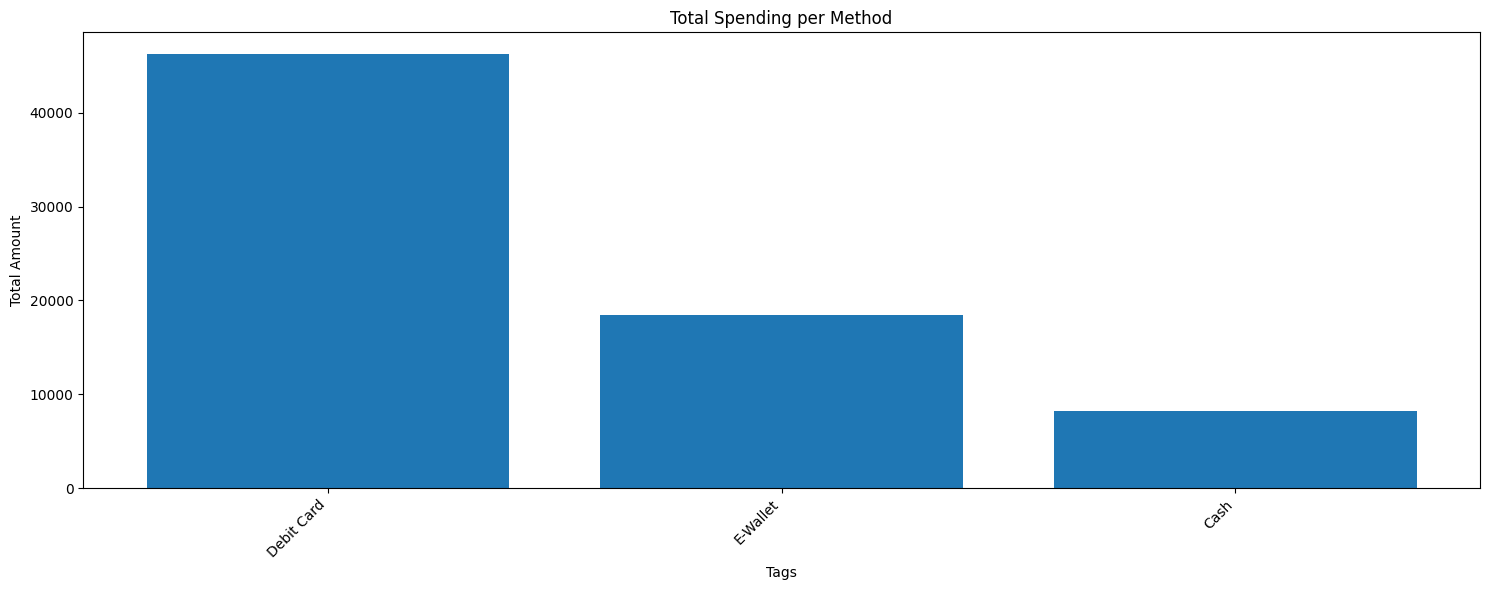

In [29]:
# Total per Payment Method

# Group the DataFrame by 'Payment Method' and calculate the total 'Amount' for each Method
Method_totals = df.groupby('Payment Method')['Amount (PHP)'].sum().reset_index()

# Sort the data by the total amount in descending order
Method_totals = Method_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the Column Chart

# Set the figure size
plt.figure(figsize=(15, 6))

# Extract the 'Payment Method' and 'Amount' columns for plotting
Method = Method_totals['Payment Method']
amounts = Method_totals['Amount (PHP)']

# Plot the column chart
plt.bar(Method, amounts)

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Total Amount')
plt.title('Total Spending per Method')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
# Tree Map per method

# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Method_totals = df.groupby('Payment Method')['Amount (PHP)'].sum().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
Method_totals = Method_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(Method_totals, path=['Payment Method'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Total Spending per Method (Treemap)')

# Show the plot
fig.show()

In [31]:
# Tree Map per method

# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Method_totals = df.groupby('Payment Method')['Amount (PHP)'].count().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
Method_totals = Method_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(Method_totals, path=['Payment Method'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='# of times a method is used')

# Show the plot
fig.show()

In [32]:
# Tree Map per method

# Data Visualization by TreeMap

# Group the DataFrame by 'Location' and calculate the total 'Amount' for each location
Method_totals = df.groupby('Payment Method')['Amount (PHP)'].mean().reset_index()

# Create the Treemap Visualization

# Sort the data by the total amount in descending order
Method_totals = Method_totals.sort_values(by='Amount (PHP)', ascending=False)

# Create the treemap visualization using Plotly Express
fig = px.treemap(Method_totals, path=['Payment Method'], values='Amount (PHP)', color='Amount (PHP)',
                 color_continuous_scale='Viridis', title='Average Amount per Method')

# Show the plot
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5520\2301161520.py:17: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



ValueError: invalid literal for int() with base 10: 'Amount (PHP)'

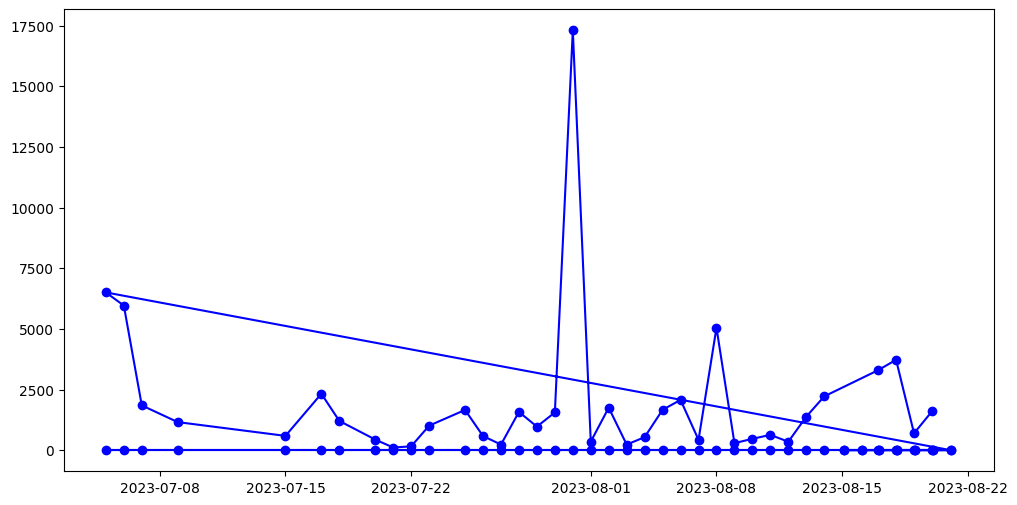

In [33]:
# Dates with no entries

# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the current day and the date 7 days ago
current_day = datetime.today()
last_7_days_start = current_day - timedelta(days=6)

# Generate a list of dates for the last 7 days
date_range = pd.date_range(start=last_7_days_start, end=current_day, freq='D')

# Create an empty DataFrame to hold the daily spending data
daily_spending = pd.DataFrame({'Date': date_range, 'Amount (PHP)': 0})

# Merge the actual spending data with the daily_spending DataFrame
daily_spending = pd.concat([daily_spending.set_index('Date'), df.groupby(df['Date'].dt.date)['Amount (PHP)'].sum()],
                           axis=1, join='outer').fillna(0).reset_index()

# Create the Line Chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Extract the 'Date' and 'Amount' columns for plotting
dates = daily_spending['Date']
amounts = daily_spending['Amount (PHP)']

# Plot the line chart
plt.plot(dates, amounts, marker='o', linestyle='-', color='b')

# Add data labels
for date, amount in zip(dates, amounts):
    plt.text(date, amount, str(int(amount)), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending per Day in the Last 7 Days (Line Chart)')

# Format the x-axis date labels as 'Month Day'
date_labels = [date.strftime('%b %d') for date in dates]
plt.xticks(dates, date_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import plotly
print(plotly.__version__)


5.15.0
